# Unsupervised Pixel Classifiers

This notebook depends on the main pipeline image analysis steps having been done first!

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import palmettobug as pbug

The PalmettoBUG package is copyrighted 2024-2025 by the Medical University of South Carolina and licensed under the GPL-3 license.
It is free & open source software, can  be redistributed in compliance with the GPL3 license, and comes with absolutely no warranty.
In python, use palmettobug.print_license() to see the license, or use palmettobug.print_3rd_party_license_info() to print information
about the licenses and copyright of 3rd party software used in PalmettoBUG itself or in the creation of PalmettoBUG.


### CHANGE The following directory to match an existing directory on your computer if you are testing this tutorial on your own machine!

In [2]:
my_computer_path =  "C:/Users/Default/Desktop"  ## CHANGE This DIRECTORY to match an existing directory on your computer if you testing this tutorial on your own machine!

## Setting up an Unsupervised Pixel Classifier

Setting up an unsupervised pixel classifier 

In [3]:
project_directory = f"{my_computer_path}/Example_IMC"
unsup = pbug.UnsupervisedClassifier(project_directory, classifier_name = "MyUnsupClassifier")

In [4]:
'''The panel file accepted by the Unsupervised classifier has a different format from the main panel file in the upper-level project directory
Fortunately, it is not too diffcult to obtain one from the other: '''
panel = pd.read_csv(project_directory + "/panel.csv")

unsup_panel = pd.DataFrame()
possible_additional_features = ['GRAD_MAG', 'HESSIAN_DET', 'HESSIAN_MAX', 'HESSIAN_MIN', 'LAPLACIAN', 'STRUCT_CO', 'STRUCT_MAX', 'STRUCT_MIN', 'WGT_STDV']                                             ## Gaussian is always used for channels that are kept in the classifier
unsup_panel['antigen'] = panel['name'][panel['keep'] == 1] 
unsup_panel['keep'] = 0                                                                 ## this column contains 
for i in possible_additional_features:
    unsup_panel[i] = 0

## Without any choices having been made:

unsup_panel              ## change 0's to 1's to select channel to keep ('keep' column) or additional features to use per channel (per column)

,antigen,keep,GRAD_MAG,HESSIAN_DET,HESSIAN_MAX,HESSIAN_MIN,LAPLACIAN,STRUCT_CO,STRUCT_MAX,STRUCT_MIN,WGT_STDV
4,aSMA,0,0,0,0,0,0,0,0,0,0
5,p-selectin,0,0,0,0,0,0,0,0,0,0
6,Vimentin,0,0,0,0,0,0,0,0,0,0
7,CD14,0,0,0,0,0,0,0,0,0,0
8,CD31,0,0,0,0,0,0,0,0,0,0
9,CD16,0,0,0,0,0,0,0,0,0,0
10,Pan-Keratin,0,0,0,0,0,0,0,0,0,0
11,CD11b,0,0,0,0,0,0,0,0,0,0
12,CD163,0,0,0,0,0,0,0,0,0,0
13,CD45,0,0,0,0,0,0,0,0,0,0


In [5]:
''' Now I will convert some of the 0's to 1's  in the table above in order to select channels and features
Note that any antigen with keep == 1 will have AT LEAST one feature used in the classifier: its Gaussian blurring (this feature is not shown in the panel, but assumed from keep == 1)
'''

unsup_panel.index = list(unsup_panel['antigen'])            ## easier using .loc to change values in python. .reset_index() is used during training, so it is important to either reset the index afterwards, or to ensure that
                                                            # that the column label 'antigen' does not cary over into the index (this is convertin gto a list() is essential). Otherwise the training will be blocked and
                                                            # error out when .reset_index() is called. 

unsup_panel.loc[['aSMA', 'Vimentin', 'Pan-Keratin', 'E-cadherin', 'Vitrionectin', 'Collagen-1', 'Beta-Catenin'],'keep'] = 1        # select channels
unsup_panel.loc['Collagen-1','HESSIAN_MIN'] = 1                       ## select additional features, for now only this hessian will be used as a demonstration
unsup_panel

,antigen,keep,GRAD_MAG,HESSIAN_DET,HESSIAN_MAX,HESSIAN_MIN,LAPLACIAN,STRUCT_CO,STRUCT_MAX,STRUCT_MIN,WGT_STDV
aSMA,aSMA,1,0,0,0,0,0,0,0,0,0
p-selectin,p-selectin,0,0,0,0,0,0,0,0,0,0
Vimentin,Vimentin,1,0,0,0,0,0,0,0,0,0
CD14,CD14,0,0,0,0,0,0,0,0,0,0
CD31,CD31,0,0,0,0,0,0,0,0,0,0
CD16,CD16,0,0,0,0,0,0,0,0,0,0
Pan-Keratin,Pan-Keratin,1,0,0,0,0,0,0,0,0,0
CD11b,CD11b,0,0,0,0,0,0,0,0,0,0
CD163,CD163,0,0,0,0,0,0,0,0,0,0
CD45,CD45,0,0,0,0,0,0,0,0,0,0


In [6]:
'''Because we instantiated the classifier BEFORE making the panel, we must assigned the unsupervised classifier's panel attribute: '''
unsup.panel = unsup_panel

## alternatively, instantiate the classifier after making the panel, and pass in the panel dataframe:
# unsup = pbug.UnsupervisedClassifier(project_directory, classifier_name = "MyUnsupClassifier", panel = unsup_panel)

## Now run the Classifier Training

In [7]:
img_directory = project_directory + "/images/img"      ## the source images for classification

sigma = 0.75        ###  blurring parameter when deriving features
size = 250000       ## number of pixels to random sample for the training -- DON'T GO TOO HIGH! Can freeze your computer haha
seed = 1234
n_clusters = 20      ## how many clusters to output
rlen = 50                         ## number of training iterations of the SOM
xydim = 10                            ## this determines the under-the-hood overclustering before metaclustering is performed. Usually, it is not very important & I select the same x&y dimensions
smoothing = 2            ## if > 0, this seeks to remove small, isolated regions of pixel class smaller the provided integer. The removed pixel classes are then filled by using the surrounding
                                        # pixels' classes.

flowsom_dictionary, training_dictionary = unsup.setup_and_train(img_directory = img_directory, sigma = sigma, size = size, seed = seed, n_clusters = n_clusters, rlen = rlen,
                               xdim = xydim, ydim = xydim, smoothing = smoothing)

C:\Users\Default\Desktop\PalmettoBUG\palmettobug\Pixel_Classification\Classifiers.py:1623: RuntimeWarning: invalid value encountered in divide
  array = (array - minimum) / (maximum - minimum)
2025-07-14 15:28:48.897 | DEBUG    | flowsom.main:__init__:82 - Reading input.
2025-07-14 15:28:48.936 | DEBUG    | flowsom.main:__init__:84 - Fitting model: clustering and metaclustering.
2025-07-14 15:32:25.908 | DEBUG    | flowsom.main:__init__:86 - Updating derived values.


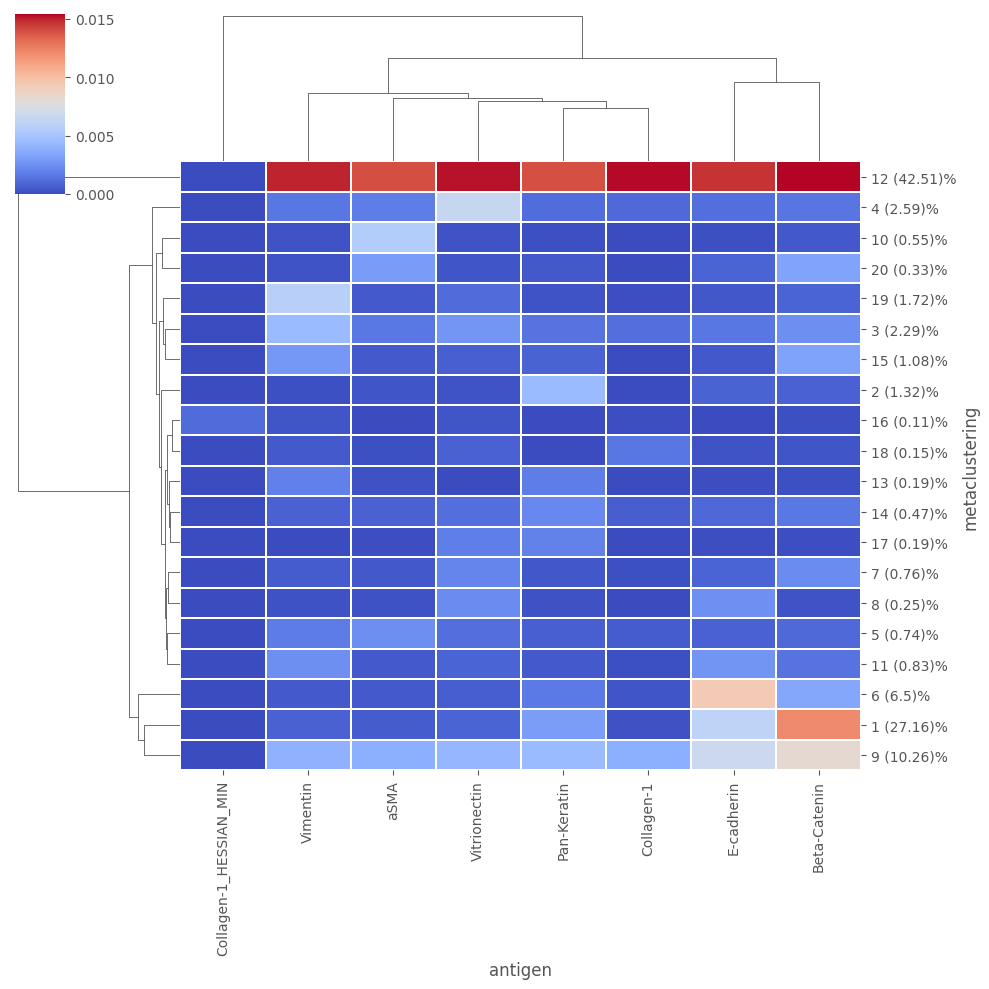

In [8]:
'''This function plots a heatmap based on the cluster centers determined during training -- because of differences in scaling, between the traning
set and predictions, and between the cluster center and the final cluster itself, this plot does not necesssarily reflect the expression in each class after prediction.

However, it is convenient that it can be plotted immediately after training, without needing to wait for predictions to be done, and it can plot the additional
features used in training (such as hessians, etc.). 
'''

clustergrid, df = pbug.plot_class_centers(flowsom_dictionary['fs'], flowsom_dictionary['panel'])
clustergrid.figure

In [9]:
unsup.predict_folder(img_directory = img_directory, flowsom_dictionary = flowsom_dictionary)

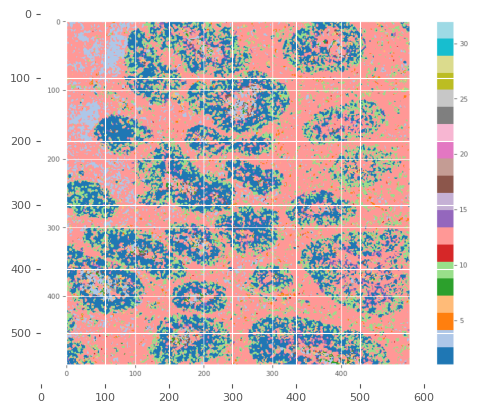

In [10]:
output_dir = project_directory+ "/PNG_unsup_classes"

pbug.plot_classes(unsup.output_dir, output_dir, cmap = 'tab20')
array = plt.imread(f"{output_dir}/{os.listdir(output_dir)[0]}")
plt.imshow(array)
plt.show()

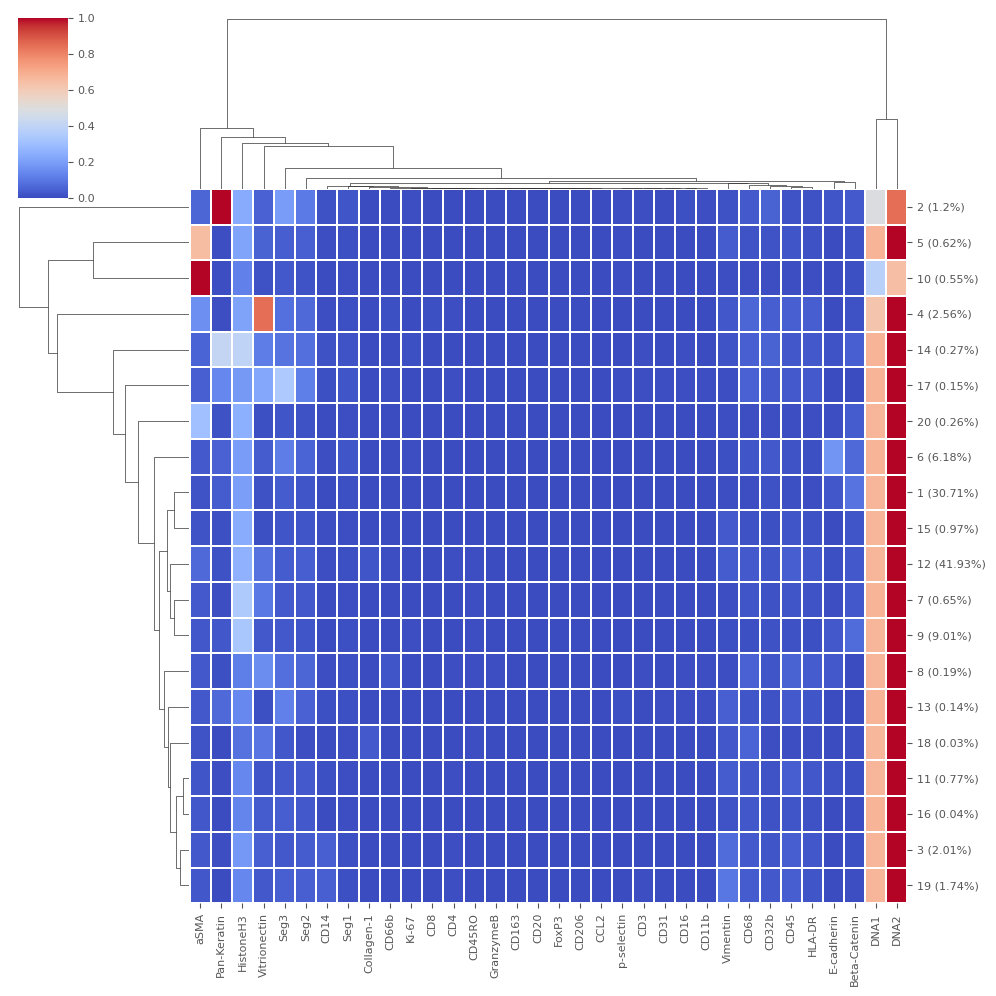

In [11]:
''' This function plots scaled expression medians of each marker in each pixel class, using the predicted pixel classes. 
It also can be used to look at the expression of antigen's that were not in pixel classifier's training features

Here I plot EVERY antigen in the dataset as a dmeonstration -- usually this would not be recommended, as antigens like DNA1/2 and Segs are not interesting
but can obscure the visibility of changes in other antigens.'''

clustergrid, df = pbug.plot_pixel_heatmap(pixel_folder = unsup.output_dir, 
                                          image_folder = img_directory, 
                                          channels = list(panel[panel['keep'] == 1]['name']), 
                                          panel = panel)
clustergrid.figure

## Merging and Annotations --

Because the unsupervised classifier tends to produce more clusters than are biologically relevant, it is standard to annotate and merge these clusters into a smaller number of more biologically relevant groupings. 
However, in this example, I will do a similar merging / annotation of classified cell masks after a secondary FlowSOM. Because it is a similar process I will not repeat that here. 

However, if annotation were to be done here, then the pbug.merge_folder() function with a 'merging_table' (a pandas dataframe with columsn for the curent and destination labels that contains the annotations)
could be used to export a folder of merged pixel classification maps. These merged pixel classifier outputs, could be in turn used in all the ways a supervised pixel classifier can be used (see that notebook for 
more details), including classifying cells by mode, extending segmentation masks, etc.

## Secondary FlowSOM

Following the Pixe / Ark-analysis packages -- from which the unsupervised classifier's of PalmettoBUG draw heavy inspiration -- PalmettoBUG offers a 'secondary' FlowSOM
method for classifying cells. 

Unlike supervised classifiers, which tends to have a few well-defined classes, unsupervised classifiers tend to produce an excessive number of classes that can tend to 
overlap with other classes or be less well-defined. Therefore, when classifying cells masks using an Unsupervised Classifier, it can difficult to directly classify
using the mode of the pixel classes inside each cell. Instead, here we cluster the cells again, using the percentage of each pixel class within each cell to group
the cells into cell types. 

However, the initial output from a scondary flowsom cell classification are numbers, and not useful biological labels -- so a further annotation & merging step
will be required afterwards.

In [12]:
'''First, we train the secondary FlowSOM '''
masks_source = 'example_deepcell_masks'     ## or, 'deepcell', etc. to do masks generated in prior notebooks (instead of example masks)
mask_folder = project_directory + f"/masks/{masks_source}"
classifier_map_folder = unsup.output_dir
number_of_classes = 20
XY_dim = 8
n_clusters = 10
seed = 42


fs, _ = pbug.secondary_flowsom(mask_folder = mask_folder, 
                               classifier_map_folder = classifier_map_folder, 
                               number_of_classes = number_of_classes, 
                               XY_dim = XY_dim, 
                               n_clusters = n_clusters, 
                               seed = seed)

2025-07-14 15:44:29.550 | DEBUG    | flowsom.main:__init__:82 - Reading input.
2025-07-14 15:44:29.603 | DEBUG    | flowsom.main:__init__:84 - Fitting model: clustering and metaclustering.
2025-07-14 15:45:34.059 | DEBUG    | flowsom.main:__init__:86 - Updating derived values.


In [13]:
''' Then predict classy-masks from it '''
name = "myVeryClassyMasks"

run_folder = project_directory + f"/classy_masks/{name}"
output_folder = run_folder + f"/{name}"
if not os.path.exists(run_folder):
    os.mkdir(run_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

cell_classifications = pbug.classify_from_secondary_flowsom(mask_folder, output_folder, flowsom_data = fs)
cell_classifications.to_csv(run_folder + f"/{name}_cell_classes.csv", index = False)   ## the name for the file here is chosen to match the output / input when using the GUI -- however, outside the GUI being this 
                                                                                        ## precise with the naming of the classy output is unnecessary, unless you intend to later load this project into the GUI.
                                                                                        ## Note the formula for the name in the GUI: {classifiername}_{masksfoldername}_masks_cell_classes.csv

## Annotating a Secondary FlowSOM

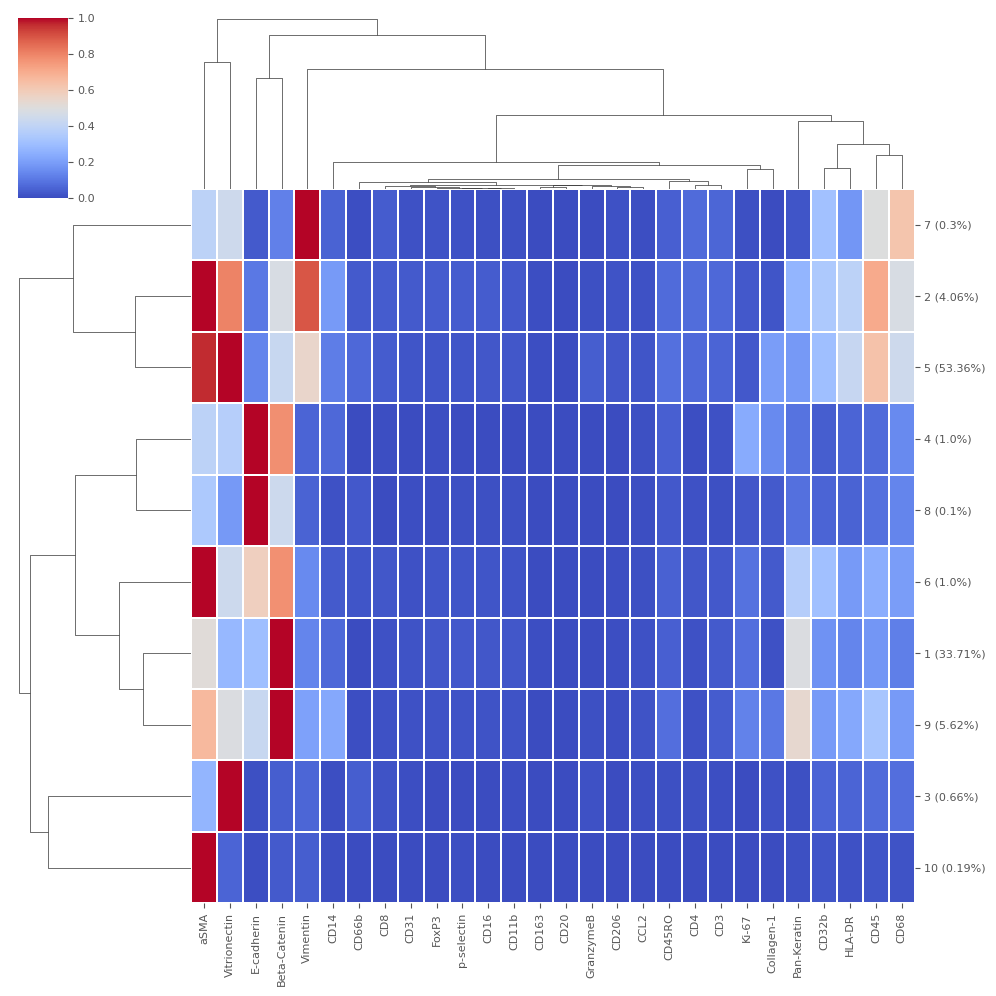

In [14]:
'''We can plot a heatmap to examine the characteristics of the cells in each classification group. 

This requires selecting the antigens we want to display in the heatmap (here, I use a previously performed Analysis_panel.csv file
to only look at 'type' markers), as well as specif. 
'''

classy_dir = output_folder
img_dir = project_directory + "/images/img"
output_path = None                ### Specify a file path if you want th eheatmap to be saved to the disk:    project_directory + "/myVeryClassyMasksHeatmap.png"    
flowsom_data = fs
classifier_name = None      ## (optional) this control the title of the graph

shortcut = f"{my_computer_path}/example_IMC/Analyses/MyAmazingAnalysis/main/Analysis_panel.csv"
type_panel = pd.read_csv(shortcut)
type_array = np.array(type_panel['marker_class'] == "type")[1:]           
                ## boolean numpy array (same length as the number of antigens) --> if you only want certain antigens shown, pass in an array here where antigens to show are True, and the rest are False

clustergrid, df = pbug.plot_pixel_heatmap(pixel_folder = classy_dir, 
                                          image_folder = img_directory, 
                                          channels = list(panel[panel['keep'] == 1].loc[type_array, 'name']), 
                                          panel = panel)
clustergrid.figure

In [15]:
'''
Now make the merging table
'''
merging_table = pd.DataFrame()
merging_table['class'] = [i for i in range(1,n_clusters+1, 1)]

## manual annotation for each cluster:
mergings = ["Vitronectin","PanKeratin","Vimentin","Vimentin","Vitronectin","BetaCatenin","aSMA","Ecadherin","Ecadherin","BetaCatenin"]
merging_table['labels'] = mergings

zip_dict = {}
for i,ii in enumerate(merging_table['labels'].unique()):
    zip_dict[ii] = i
    
merging_table['merging'] = merging_table['labels'].replace(zip_dict)
merging_table.to_csv(run_folder + f"/secondary_merging.csv", index = False)
merging_table

,class,labels,merging
0,1,Vitronectin,0
1,2,PanKeratin,1
2,3,Vimentin,2
3,4,Vimentin,2
4,5,Vitronectin,0
5,6,BetaCatenin,3
6,7,aSMA,4
7,8,Ecadherin,5
8,9,Ecadherin,5
9,10,BetaCatenin,3


In [16]:
pbug.merge_folder(output_folder, merging_table = merging_table)

zip_dict = {}
for i,ii in zip(merging_table['class'], merging_table['labels']):
    zip_dict[i] = ii

new_cell_classifications = cell_classifications.replace(zip_dict)
new_cell_classifications.to_csv(run_folder + f"/secondary_cell_classification.csv", index = False)
new_cell_classifications

Warning! One of your merging classes == 1. This can create errors when running mode-based cell classification,and 1 is preferably reserved as a merging number.


,classification
0,Vimentin
1,Vitronectin
2,Vitronectin
3,PanKeratin
4,Vitronectin
...,...
36922,Vitronectin
36923,Vitronectin
36924,Vitronectin
36925,Vitronectin
